In [2]:
import pandas as pd
import numpy as np

# 🏦 Bank Customer Dataset Schema

This notebook documents the schema of a customer dataset used for banking churn analysis. It includes feature descriptions, data types, and inferred meanings to guide preprocessing and modeling.

---

## 📋 Dataset Columns

| Column Name           | Data Type | Description (Inferred)                                      |
|-----------------------|-----------|--------------------------------------------------------------|
| `id`, `CustomerId`    | int64     | Unique identifiers for each customer.                        |
| `Surname`             | object    | Customer's last name.                                        |
| `CreditScore`         | int64     | Credit score of the customer.                                |
| `Geography`, `Gender` | object    | Categorical features representing location and gender.       |
| `Age`                 | float64   | Customer's age.                                              |
| `Tenure`              | int64     | Number of years the customer has been with the bank.         |
| `Balance`             | float64   | Account balance.                                             |
| `EstimatedSalary`     | float64   | Estimated annual salary.                                     |
| `NumOfProducts`       | int64     | Number of bank products the customer uses.                   |
| `HasCrCard`           | float64   | Binary flag: 1 if customer has a credit card, else 0.        |
| `IsActiveMember`      | float64   | Binary flag: 1 if customer is active, else 0.                |
| `Exited`              | int64     | Target variable: 1 if customer exited (churned), else 0.     |

---

## 🧭 Notes

- Binary flags (`HasCrCard`, `IsActiveMember`) are stored as `float64`, which may require conversion to `int` or `bool` for modeling.
- Categorical features (`Geography`, `Gender`) may need encoding (e.g., one-hot or label encoding).
- `Exited` is the target variable for churn prediction.

---

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.drop(columns=['id' , 'CustomerId' , 'Surname'],inplace=True)

In [5]:
categorical_features = df.select_dtypes(include='O').columns

In [6]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

# Applying OHE in Geography and Ordinal Encoder on Gender Feature

Female = 0

Male = 1

In [7]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [8]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder , OrdinalEncoder

In [9]:
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer

In [10]:
cols = df.columns

In [11]:
X = df.drop(columns='Exited')
y = df['Exited']

In [12]:
preprocessing = ColumnTransformer(
    transformers=[
        ('Gender_Ordinal_Encoder' , OrdinalEncoder() , ['Gender']),
        ('Geography_OHE' , OneHotEncoder(handle_unknown='ignore' , sparse_output=False) , ['Geography'])
    ],remainder=StandardScaler()
)

In [13]:
preprocessed_data = preprocessing.fit_transform(X)

In [14]:
preprocessing

,transformers,"[('Gender_Ordinal_Encoder', ...), ('Geography_OHE', ...)]"
,remainder,StandardScaler()
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'


In [15]:
preprocessing.get_feature_names_out()

array(['Gender_Ordinal_Encoder__Gender',
       'Geography_OHE__Geography_France',
       'Geography_OHE__Geography_Germany',
       'Geography_OHE__Geography_Spain', 'remainder__CreditScore',
       'remainder__Age', 'remainder__Tenure', 'remainder__Balance',
       'remainder__NumOfProducts', 'remainder__HasCrCard',
       'remainder__IsActiveMember', 'remainder__EstimatedSalary'],
      dtype=object)

In [16]:
X_preprocessed = pd.DataFrame(preprocessed_data , columns=preprocessing.get_feature_names_out())

In [17]:
df.shape

(165034, 11)

In [18]:
X_preprocessed

,Gender_Ordinal_Encoder__Gender,Geography_OHE__Geography_France,Geography_OHE__Geography_Germany,Geography_OHE__Geography_Spain,remainder__CreditScore,remainder__Age,remainder__Tenure,remainder__Balance,remainder__NumOfProducts,remainder__HasCrCard,remainder__IsActiveMember,remainder__EstimatedSalary
0,1.0,1.0,0.0,0.0,0.144135,-0.578074,-0.719973,-0.883163,0.814298,0.571263,-0.99555,1.369486
1,1.0,1.0,0.0,0.0,-0.367706,-0.578074,-1.432694,-0.883163,0.814298,0.571263,1.00447,-1.254085
2,1.0,1.0,0.0,0.0,0.268974,0.211354,1.774548,-0.883163,0.814298,0.571263,-0.99555,1.437422
3,1.0,1.0,0.0,0.0,-0.941966,-0.465299,-1.076334,1.486918,-1.013348,0.571263,1.00447,-0.557018
4,1.0,0.0,0.0,1.0,0.743362,-0.578074,-0.007253,-0.883163,0.814298,0.571263,1.00447,-1.938770
...,...,...,...,...,...,...,...,...,...,...,...,...
165029,0.0,0.0,0.0,1.0,0.131651,-0.578074,-1.076334,-0.883163,-1.013348,0.571263,1.00447,0.382957
165030,1.0,1.0,0.0,0.0,1.692140,-0.352523,-0.719973,-0.883163,-1.013348,-1.750507,-0.99555,0.382951
165031,1.0,1.0,0.0,0.0,-1.141708,-0.803625,-0.007253,-0.883163,-1.013348,0.571263,1.00447,0.295366
165032,0.0,0.0,0.0,1.0,-1.279031,-0.916401,0.705467,1.688303,-1.013348,-1.750507,1.00447,-0.823217


In [19]:
import pickle

with open('preprocessed.pkl' , 'wb') as file:
    pickle.dump(preprocessing,file)

# Training The Model

In [20]:
cols = X_preprocessed.columns

In [21]:
cols

Index(['Gender_Ordinal_Encoder__Gender', 'Geography_OHE__Geography_France',
       'Geography_OHE__Geography_Germany', 'Geography_OHE__Geography_Spain',
       'remainder__CreditScore', 'remainder__Age', 'remainder__Tenure',
       'remainder__Balance', 'remainder__NumOfProducts',
       'remainder__HasCrCard', 'remainder__IsActiveMember',
       'remainder__EstimatedSalary'],
      dtype='object')

In [22]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X_preprocessed , y , test_size=0.2 , random_state=42)

In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority' , random_state=42)

In [24]:
X_train_resample , y_train_resample = smote.fit_resample(X_train , y_train)

# Applying RandomForest on this dataset

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
RFC = RandomForestClassifier(n_estimators=100 , oob_score=True)
RFC.fit(X_train_resample , y_train_resample)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [27]:
y_pred = RFC.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.8456993970975853

# Applying XGBoost ALgo

In [29]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train , y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [30]:
y_pred = xgb.predict(X_test)

In [31]:
accuracy_score(y_test , y_pred)

0.8653012997243009

# Applying ANN

In [ ]:
X_train.shape

In [ ]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Dropout , BatchNormalization
from tensorflow.keras.regularizers import l2

import keras_tuner as kt

In [ ]:
def build_model(hp):
    model = Sequential()
    
    # num of layers
    layers = hp.Int('hiddenLayer' , min_value = 1 , max_value = 10)

    for i in range(layers):
        unit = hp.Int(f'Neurons_{i}' , min_value = 8 , max_value = 256)
        activation = hp.Choice(f'Activation_{i}' , values = ['relu' , 'leaky_relu'])
        regularizer = hp.Choice(f'Regularizer_{i}' , values = [0.001 , 0.0001 , 0.0003])
        wtInit = hp.Choice(f"wt_Init_{i}" , values = ['he_normal' , 'he_uniform'])
        dropout = hp.Choice(f'DroupOut_{i}' , values = [0.3 , 0.4 , 0.5])

        if i == 0 :
            model.add(
                Dense(
                    unit , 
                    activation = activation , 
                    input_dim = X_train.shape[1] , 
                    kernel_regularizer = l2(regularizer) ,
                    kernel_initializer = wtInit
                )
            )
            model.add(Dropout(dropout))
            model.add(BatchNormalization())
        
        else:
            model.add(
                Dense(
                    unit , 
                    activation = activation , 
                    kernel_regularizer = l2(regularizer) ,
                    kernel_initializer = wtInit
                )
            )
            model.add(Dropout(dropout))
            model.add(BatchNormalization())
        
    # Output Layer
    model.add(Dense(1 , activation = 'sigmoid')) 
    
    lr = hp.Choice('optimizer_Lr' , values = [0.0001 , 0.0003])
    optimizers = keras.optimizers.Adam(learning_rate=lr)
    model.compile(loss = 'binary_crossentropy' , optimizer=optimizers , metrics=['accuracy'])

    return model

In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective = 'val_accuracy',
    max_trials = 10,
    directory = 'Model_Tuner',
    project_name = 'Churn Prediction'
)

C:\Users\LeoML\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
tuner.search(X_train , y_train , epochs = 10 , validation_data = (X_test , y_test))

Trial 10 Complete [00h 01m 35s]
val_accuracy: 0.8588178157806396

Best val_accuracy So Far: 0.8627563714981079
Total elapsed time: 00h 21m 52s


In [ ]:
tuner.get_best_hyperparameters()[0].values

{'hiddenLayer': 6,
 'Neurons_0': 213,
 'Activation_0': 'relu',
 'Regularizer_0': 0.001,
 'wt_Init_0': 'he_normal',
 'DroupOut_0': 0.3,
 'optimizer_Lr': 0.0003,
 'Neurons_1': 8,
 'Activation_1': 'relu',
 'Regularizer_1': 0.001,
 'wt_Init_1': 'he_normal',
 'DroupOut_1': 0.3,
 'Neurons_2': 8,
 'Activation_2': 'relu',
 'Regularizer_2': 0.001,
 'wt_Init_2': 'he_normal',
 'DroupOut_2': 0.3,
 'Neurons_3': 8,
 'Activation_3': 'relu',
 'Regularizer_3': 0.001,
 'wt_Init_3': 'he_normal',
 'DroupOut_3': 0.3,
 'Neurons_4': 8,
 'Activation_4': 'relu',
 'Regularizer_4': 0.001,
 'wt_Init_4': 'he_normal',
 'DroupOut_4': 0.3,
 'Neurons_5': 8,
 'Activation_5': 'relu',
 'Regularizer_5': 0.001,
 'wt_Init_5': 'he_normal',
 'DroupOut_5': 0.3}

In [ ]:
model = tuner.get_best_models(num_models=1)[0]

C:\Users\LeoML\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\LeoML\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 54 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 213)            │         2,769 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 213)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 213)            │           852 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,790 (22.62 KB)

 Trainable params: 5,284 (20.64 KB)

 Non-trainable params: 506 (1.98 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(
    monitor = 'val_accuracy',
    min_delta = 0.001,
    patience = 20 ,
    mode = 'auto',
    baseline = None
)

In [ ]:
history = model.fit(
    X_train ,
    y_train ,
    epochs=100 , 
    initial_epoch=10 ,
    callbacks = callback ,
    validation_data=(X_test ,y_test)
)

Epoch 11/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8335 - loss: 0.3940 - val_accuracy: 0.8646 - val_loss: 0.3453
Epoch 12/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8336 - loss: 0.3938 - val_accuracy: 0.8647 - val_loss: 0.3457
Epoch 13/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8333 - loss: 0.3924 - val_accuracy: 0.8607 - val_loss: 0.3477
Epoch 14/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8340 - loss: 0.3894 - val_accuracy: 0.8645 - val_loss: 0.3442
Epoch 15/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8354 - loss: 0.3899 - val_accuracy: 0.8626 - val_loss: 0.3432
Epoch 16/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8345 - loss: 0.3894 - val_accuracy: 0.8639 - val_loss: 0.3449
Epoch 17/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8337 - loss: 0.3885 - val_accuracy: 0.8646 - val_loss: 0.3420
Epoch 18/100
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8330 

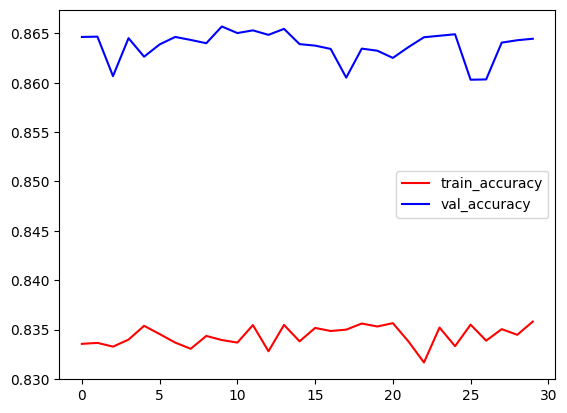

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'] , color = 'red' , label = 'train_accuracy')
plt.plot(history.history['val_accuracy'] , color = 'blue' , label = 'val_accuracy')
plt.legend()

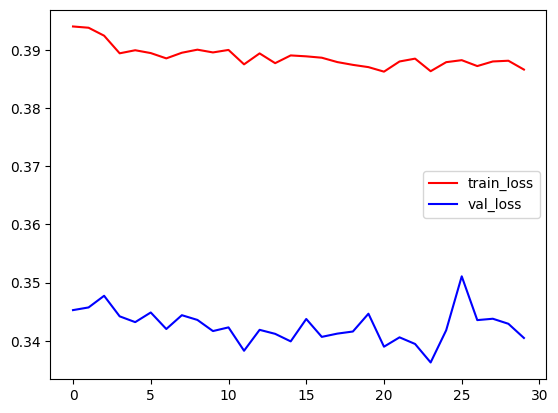

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'] , color = 'red' , label = 'train_loss')
plt.plot(history.history['val_loss'] , color = 'blue' , label = 'val_loss')
plt.legend()

# Selected Model --> XGBoost

In [33]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()

In [35]:
param_grid = {
    'eta' : [0.01 , 0.05 , 0.1 , 0.2],
    'max_depth':[6 , 8 , 10 , 12],
    'n_estimators' : [100 , 300 ,500 , 800],
    'min_child_weight' : [2 , 5 , 10 , 15],
    'gamma': [0 , 2 , 5]
}

In [36]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10 , shuffle = True , random_state=42)

In [37]:
from sklearn.model_selection import GridSearchCV
gsv = GridSearchCV(xgb_classifier , param_grid=param_grid , cv= kfold , return_train_score=True , n_jobs=-1,scoring='accuracy',verbose=True)

In [38]:
gsv.fit(X_train , y_train)

Fitting 10 folds for each of 768 candidates, totalling 7680 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'eta': [0.01, 0.05, ...], 'gamma': [0, 2, ...], 'max_depth': [6, 8, ...], 'min_child_weight': [2, 5, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,objective,'binary:logistic'


In [39]:
gsv.best_params_

{'eta': 0.1,
 'gamma': 0,
 'max_depth': 6,
 'min_child_weight': 2,
 'n_estimators': 100}

In [40]:
gsv.best_score_

np.float64(0.8656638526844566)